# **PROJECT TITLE** :  **INDRIVE GREEN JOURNEY VS YANGO RED RIDE**






### **LIBRARIES**

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from geopandas import GeoDataFrame
import geopandas as gpd
from shapely.geometry import Point
import seaborn as sns
import plotly.express as px
from google.colab import drive
from sklearn.linear_model import LinearRegression
import re
import folium
from folium.plugins import MarkerCluster
import numpy as np
from folium.plugins import HeatMap
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Cleaned DataSet csv - Sheet1 (1).csv")


data.drop(data.filter(regex="Unnamed:"),axis=1, inplace=True)
data.drop(data.filter(regex="Sr."),axis=1, inplace=True)
data["weather"]=data["weather"].replace(to_replace=["normal","rainy"], value=[1,0])
data.head(5)

,Date,Time,Pick up location,drop off location,Yango Economy,Yango Comfort,Yango Bike,Distance (km),Indrive Economy,Indrive Comfort,Indrive Bike,weather,Time Category,Fare Difference,Fare Difference Bike,Weekday
0,2023-11-30,11:28:00,IBH BOYS HOSTEL e/11,Mudan Residence guest house e/11,342,407,66,0.22,178,290,80,1,Morning,164,14,Thu
1,2023-11-27,1:55:00,Jamia Masjid Qurtubah e/11,Luxury Apartment Hotel & Guest House e/11,167,287,70,0.25,178,290,80,1,NaN,11,10,Mon
2,2023-11-27,13:55:00,Jamia Masjid Qurtubah e/11,Luxury Apartment Hotel & Guest House e/11,167,287,70,0.25,178,290,80,1,Afternoon,11,10,Mon
3,2023-11-27,12:38:00,Sir Syed CASE Institute of Technology b/17,Farhan motors and properties Block A Sector B-17,132,165,56,0.35,299,80,178,1,Afternoon,167,122,Mon
4,2023-11-27,13:15:00,Jamia Masjid Qurtubah e/11,"Autism Resource Centre, Islamabad e/11",167,277,70,0.50,178,290,80,1,Afternoon,11,10,Mon


In [45]:
data.isnull().sum()

Date                     0
Time                     0
Pick up location         0
drop off location        0
Yango Economy            0
Yango Comfort            0
Yango Bike               0
Distance (km)            0
Indrive Economy          0
Indrive Comfort          0
Indrive Bike             0
weather                  0
Time Category           86
Fare Difference          0
Fare Difference Bike     0
Weekday                  0
dtype: int64

In [46]:
data["Date"] = pd.to_datetime(data["Date"], format="%Y-%m-%d")

#Weekday
data["Weekday"] = data["Date"].dt.weekday

weekday_names = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
data["Weekday"] = data["Weekday"].apply(lambda x: weekday_names[x])


# Save updated data
data.to_csv("testing.csv", index=False)

# Display the updated data
data

,Date,Time,Pick up location,drop off location,Yango Economy,Yango Comfort,Yango Bike,Distance (km),Indrive Economy,Indrive Comfort,Indrive Bike,weather,Time Category,Fare Difference,Fare Difference Bike,Weekday
0,2023-11-30,11:28:00,IBH BOYS HOSTEL e/11,Mudan Residence guest house e/11,342,407,66,0.22,178,290,80,1,Morning,164,14,Thu
1,2023-11-27,1:55:00,Jamia Masjid Qurtubah e/11,Luxury Apartment Hotel & Guest House e/11,167,287,70,0.25,178,290,80,1,NaN,11,10,Mon
2,2023-11-27,13:55:00,Jamia Masjid Qurtubah e/11,Luxury Apartment Hotel & Guest House e/11,167,287,70,0.25,178,290,80,1,Afternoon,11,10,Mon
3,2023-11-27,12:38:00,Sir Syed CASE Institute of Technology b/17,Farhan motors and properties Block A Sector B-17,132,165,56,0.35,299,80,178,1,Afternoon,167,122,Mon
4,2023-11-27,13:15:00,Jamia Masjid Qurtubah e/11,"Autism Resource Centre, Islamabad e/11",167,277,70,0.50,178,290,80,1,Afternoon,11,10,Mon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,2023-12-05,11:10:00,Bahria E-8/1,PIEAS (lehtrar Road),1099,1395,582,30.50,1091,1557,475,1,Morning,8,107,Tue
994,2023-12-05,10:59:00,Bahria E-8/1,Giga Mall f11,932,1193,524,31.00,1119,1596,487,1,Morning,187,37,Tue
995,2023-11-29,15:37:00,Margalla Filling Station Total PARCO Petrol Pu...,Chather park murree road,893,1113,980,34.30,1747,535,1227,1,Afternoon,854,247,Wed
996,2023-11-29,15:29:00,Margalla Filling Station Total PARCO Petrol Pu...,Lake view park murree road,952,1868,1000,38.10,1957,601,1375,1,Afternoon,1005,375,Wed


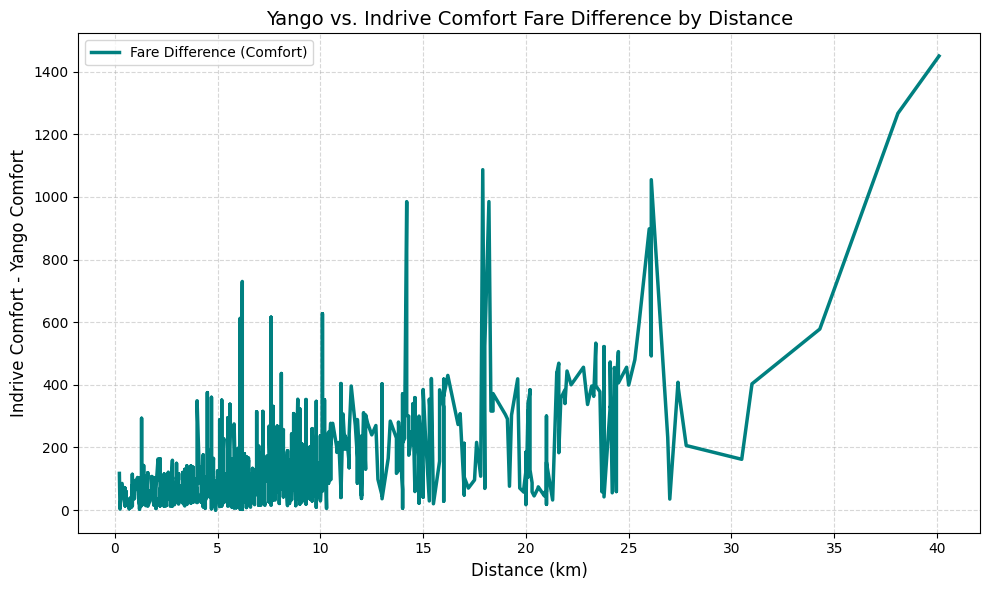

In [47]:
# Calculate fare difference for comfort rides
data["Fare Difference Comfort"] = abs(data["Indrive Comfort"] - data["Yango Comfort"])

# Sort data by Distance (km) in ascending order
data_sorted = data.sort_values(by="Distance (km)")

# Create the line graph with visual enhancements
plt.figure(figsize=(10, 6))  # Size for better visibility
plt.plot(
    data_sorted["Distance (km)"],
    data_sorted["Fare Difference Comfort"],  # Plot the actual fare difference values
    color="#008080",  # Teal for comfort rides
    linewidth=2.5,  # Thicker line for emphasis
    label="Fare Difference (Comfort)",
)

# Customize labels and title
plt.xlabel("Distance (km)", fontsize=12)  # Increase font size
plt.ylabel("Indrive Comfort - Yango Comfort", fontsize=12)  # Adjust label
plt.title("Yango vs. Indrive Comfort Fare Difference by Distance", fontsize=14)

# Add grid lines (optional)
plt.grid(True, linestyle="--", alpha=0.5)  # Subtle grid

# Add legend
plt.legend(loc="upper left", fontsize=10)

# Customize appearance
plt.xticks(fontsize=10)  # Adjust tick label size
plt.yticks(fontsize=10)
plt.tight_layout()  # Adjust layout for better spacing

# Show the plot
plt.show()

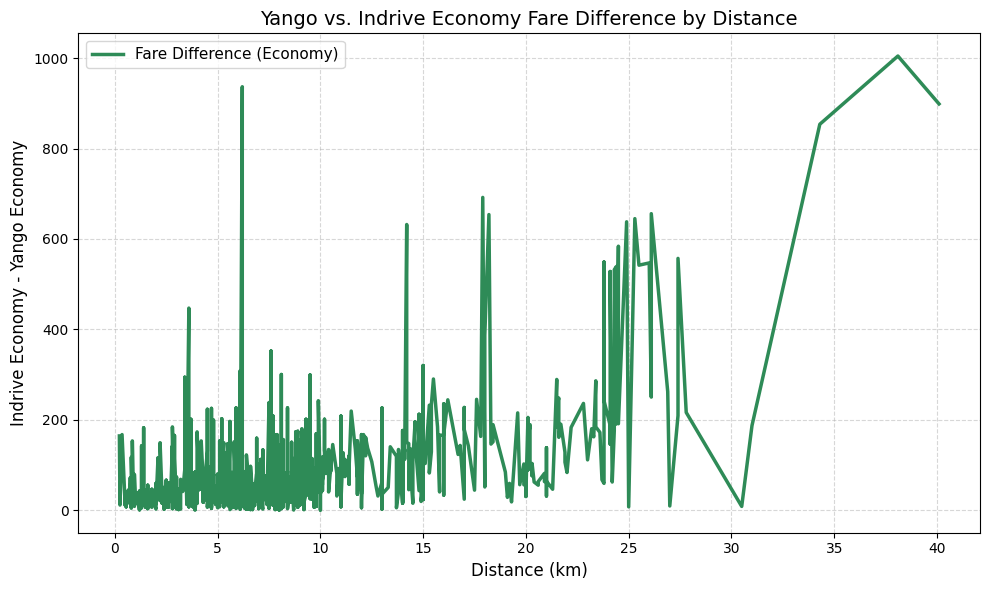

In [48]:

# Calculate fare difference for economy rides
data["Fare Difference Economy"] = abs(data["Indrive Economy"] - data["Yango Economy"])

# Sort data by Distance (km) in ascending order
data_sorted = data.sort_values(by="Distance (km)")

# Create the line graph with visual enhancements
plt.figure(figsize=(10, 6))  # Size for better visibility
plt.plot(
    data_sorted["Distance (km)"],
    data_sorted["Fare Difference Economy"],  # Plot the actual fare difference values
    color="#2E8B57",  # Forest green for economy rides
    linewidth=2.5,  # Thicker line for emphasis
    label="Fare Difference (Economy)",
)

# Customize labels and title
plt.xlabel("Distance (km)", fontsize=12)  # Increase font size
plt.ylabel("Indrive Economy - Yango Economy", fontsize=12)  # Adjust label
plt.title("Yango vs. Indrive Economy Fare Difference by Distance", fontsize=14)

# Add grid lines (optional)
plt.grid(True, linestyle="--", alpha=0.5)  # Subtle grid

# Add legend
plt.legend(loc="upper left", fontsize=11)

# Customize appearance
plt.xticks(fontsize=10)  # Adjust tick label size
plt.yticks(fontsize=10)
plt.tight_layout()  # Adjust layout for better spacing

# Show the plot
plt.show()


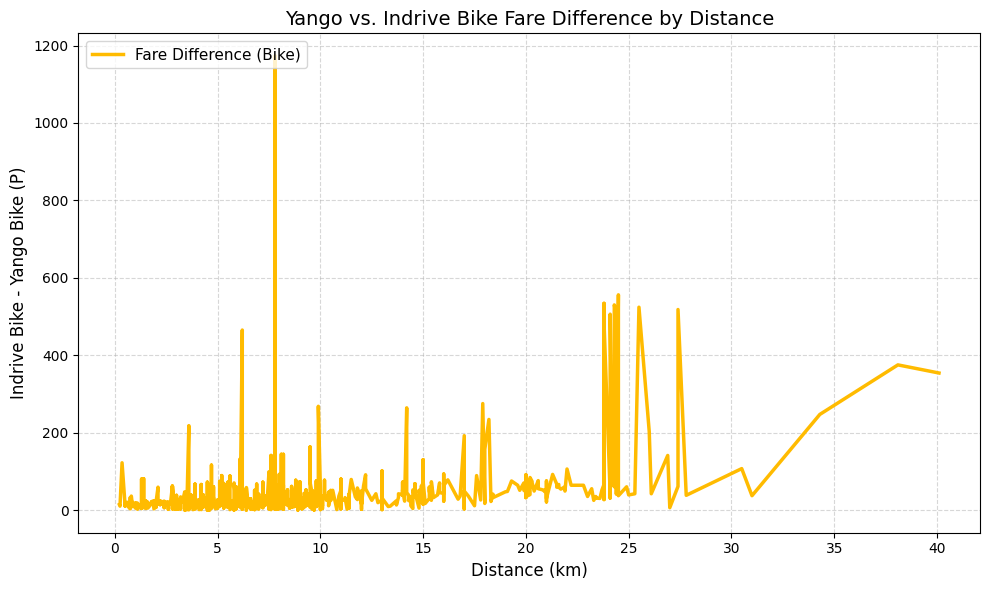

In [49]:
# Calculate fare difference for bike rides
data["Fare Difference Bike"] = abs(data["Indrive Bike"] - data["Yango Bike"])

# Sort data by Distance (km) in ascending order
data_sorted = data.sort_values(by="Distance (km)")

# Create the line graph with visual enhancements
plt.figure(figsize=(10, 6))  # Size for better visibility
plt.plot(
    data_sorted["Distance (km)"],
    data_sorted["Fare Difference Bike"],  # Plot the actual fare difference values
    color="#FFBB00",  # Bright orange for bike rides
    linewidth=2.5,  # Thicker line for emphasis
    label="Fare Difference (Bike)",
)

# Customize labels and title
plt.xlabel("Distance (km)", fontsize=12)  # Increase font size
plt.ylabel("Indrive Bike - Yango Bike (P)", fontsize=12)  # Adjust label
plt.title("Yango vs. Indrive Bike Fare Difference by Distance", fontsize=14)

# Add grid lines (optional)
plt.grid(True, linestyle="--", alpha=0.5)  # Subtle grid

# Add legend
plt.legend(loc="upper left", fontsize=11)

# Customize appearance
plt.xticks(fontsize=10)  # Adjust tick label size
plt.yticks(fontsize=10)
plt.tight_layout()  # Adjust layout for better spacing

# Show the plot
plt.show()


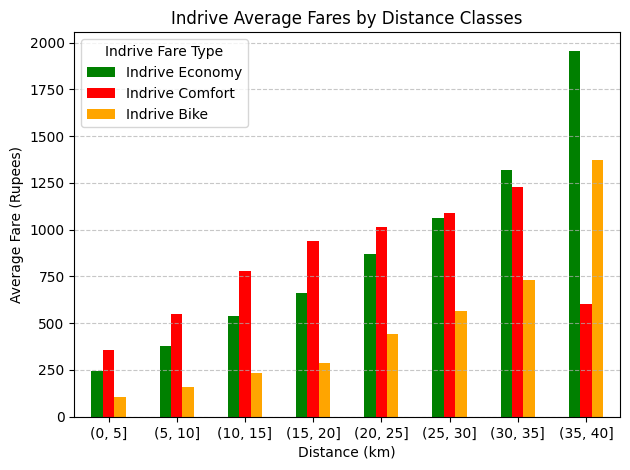

In [50]:

# Create a custom color list
distance_classes = pd.cut(data["Distance (km)"], bins=range(0, 41, 5))

# Group data and calculate averages
data_grouped = data.groupby(distance_classes)[["Indrive Economy", "Indrive Comfort", "Indrive Bike"]].mean()

# Reset index inplace
colors = ["green", "red", "orange"]

# Create the bar chart
data_grouped.plot(
    kind="bar",
    stacked=False,
    color=colors,
    title="Indrive Average Fares by Distance Classes",
)

# Customize the plot (rest of the code remains the same)
plt.xlabel("Distance (km)")
plt.ylabel("Average Fare (Rupees)")
plt.xticks(rotation=0)
plt.legend(title="Indrive Fare Type")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

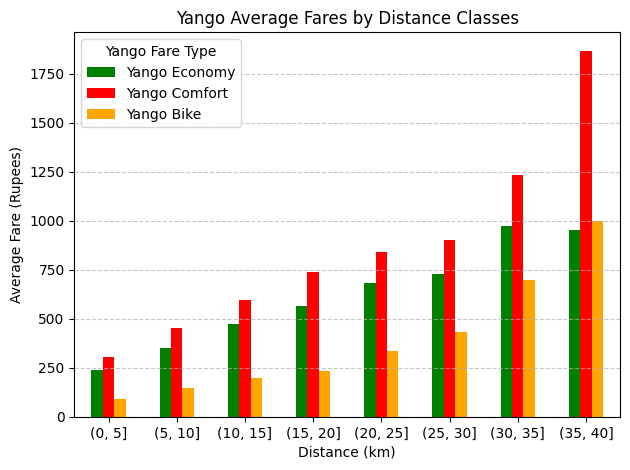

In [51]:

# Create a custom color list
distance_classes = pd.cut(data["Distance (km)"], bins=range(0, 41, 5))

# Group data and calculate averages
data_grouped = data.groupby(distance_classes)[["Yango Economy", "Yango Comfort", "Yango Bike"]].mean()

# Reset index inplace
colors = ["green", "red", "orange"]

# Create the bar chart
data_grouped.plot(
    kind="bar",
    stacked=False,
    color=colors,
    title="Yango Average Fares by Distance Classes",
)

# Customize the plot (rest of the code remains the same)
plt.xlabel("Distance (km)")
plt.ylabel("Average Fare (Rupees)")
plt.xticks(rotation=0)
plt.legend(title="Yango Fare Type")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [52]:
data.columns

Index(['Date', 'Time', 'Pick up location', 'drop off location',
       'Yango Economy', 'Yango Comfort', 'Yango Bike', 'Distance (km)',
       'Indrive Economy', 'Indrive Comfort', 'Indrive Bike', 'weather',
       'Time Category', 'Fare Difference', 'Fare Difference Bike', 'Weekday',
       'Fare Difference Comfort', 'Fare Difference Economy'],
      dtype='object')

In [53]:
import plotly.graph_objects as go

# Create the line graph traces directly
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=data["Distance (km)"],
        y=data["Yango Comfort"],
        name="Yango Comfort",
        line=dict(color="red"),  # Adapting from the original color scheme
    )
)
fig.add_trace(
    go.Scatter(
        x=data["Distance (km)"],
        y=data["Indrive Comfort"],
        name="Indrive Comfort",
        line=dict(color="black"),  # Keeping the same line style
    )
)

# Customize the layout (mostly reusing previous settings)
fig.update_layout(
    title="Comparison of Yango Comfort and Indrive Comfort Fares",
    xaxis_title="Distance (km)",
    yaxis_title="Fare",  # Generalizing for both fares
    font=dict(family="Arial", size=12),
    margin=dict(l=50, r=50, t=40, b=40),
    legend=dict(title="Fare Type", x=0.05, y=1),
)

# Show the line graph
fig.show()


In [54]:
import plotly.graph_objects as go

# Calculate fare difference (unchanged)
data["Fare Difference"] = abs(data["Indrive Economy"] - data["Yango Economy"])

# Create line graph traces directly
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=data["Distance (km)"],
        y=data["Indrive Economy"],
        name="Indrive Economy",
        line=dict(color="green"),  # Adapting from the original color scheme
    )
)
fig.add_trace(
    go.Scatter(
        x=data["Distance (km)"],
        y=data["Yango Economy"],
        name="Yango Economy",
        line=dict(color="black"),  # Keeping the same line style
    )
)

# Customize the layout (mostly reusing previous settings)
fig.update_layout(
    title="Comparison of Yango Economy and Indrive Economy Fares",
    xaxis_title="Distance (km)",
    yaxis_title="Fare",  # Generalizing for both fares
    font=dict(family="Arial", size=12),
    margin=dict(l=50, r=50, t=40, b=40),
    legend=dict(title="Fare Type", x=0.05, y=1),
)

# Show the line graph
fig.show()


In [55]:
data.columns

Index(['Date', 'Time', 'Pick up location', 'drop off location',
       'Yango Economy', 'Yango Comfort', 'Yango Bike', 'Distance (km)',
       'Indrive Economy', 'Indrive Comfort', 'Indrive Bike', 'weather',
       'Time Category', 'Fare Difference', 'Fare Difference Bike', 'Weekday',
       'Fare Difference Comfort', 'Fare Difference Economy'],
      dtype='object')

# Each Sector Data

In [56]:
def extract_sector(address):
    # Remove spaces and convert to lowercase for case-insensitive matching
    match = re.search(r'[a-iA-I]+[\s/\-]*\d+', address)

    if match:
        return match.group().upper()  # Convert to uppercase for consistency
    else:
        return None

def clean_sector(sector):
    # Remove spaces, slashes, and hyphens and convert to uppercase
    if sector != None:
      cleaned_sector = re.sub(r'[\s/\-]', '', str(sector)).upper()
      return cleaned_sector

def counter(cleaned_sectors):
  element_counts = {}
  for element in cleaned_sectors:
      # Check if the element is None
      if element is not None:
          # If the element is already a key in the dictionary, increment the count
          if element in element_counts:
              element_counts[element] += 1
          # If the element is not a key, create it with a count of 1
          else:
              element_counts[element] = 1

  return element_counts


# Create a list of sectors
sectors_pickup = list(map(extract_sector, data['Pick up location']))
sectors_drop = list(map(extract_sector, data['drop off location']))



# Display the list of sectors
print(sectors_pickup)
print(sectors_drop)



cleaned_sectors_pickup = list(map(clean_sector, sectors_pickup))
cleaned_sectors_drop = list(map(clean_sector, sectors_drop))


# print(cleaned_sectors_pickup)
# print(cleaned_sectors_drop)

pie_pickup = counter(cleaned_sectors_pickup)
pie_drop = counter(cleaned_sectors_drop)

['E/11', 'E/11', 'E/11', 'B/17', 'E/11', 'B-17', 'E/11', 'E/11', 'E/11', 'E 9', 'E/11', 'E/11', 'E/11', 'E/8', 'E/11', 'E/11', 'E/8', 'E/11', 'E/11', 'E/11', 'E-8', 'E/8', 'E/11', 'E/11', 'E-8', 'E/11', 'E/11', 'E/8', 'I-14', 'E/11', 'E/11', 'E11', 'E/11', 'E/11', 'E/11', 'E/11', 'E-11', 'E 9', 'G-9', 'E/11', 'E/11', 'I-14', 'E/11', 'E 9', 'E/9', 'E-8', 'E 9', 'E 9', 'F/8', 'H/8', 'E/8', 'I-8', 'I-10', 'E 9', 'F/8', 'F/8', 'I-8', 'F/8', 'H/9', 'E/11', 'E/9', 'F/8', 'I-8', 'I-8', 'E/8', 'E/9', 'F/8', 'F/8', 'F/8', 'E 9', 'E/8', 'E/11', 'F/8', 'E 9', 'I-14', 'F/6', 'E/11', 'E 9', 'E 9', 'E/8', 'E/8', 'E/9', 'F/8', 'E 9', 'E 9', 'G-9', 'E/11', 'E/8', 'E/11', 'I-9', 'E/11', 'F/8', 'E/8', 'E-8', 'E 9', 'E 9', 'B-17', 'G-9', 'B/19', 'I-9', 'E-8', 'E 9', 'E/11', 'E/8', 'F/8', 'F8', 'F11', 'F/8', 'E/8', 'F/11', 'E 9', 'F/8', 'E/8', 'F/8', 'E/9', 'E/8', 'E/8', 'F/8', 'E/9', 'E-8', 'E/9', 'F8', 'E/9', 'E-11', 'E-8', 'E/8', 'E/8', 'B/20', 'B/18', 'E/8', 'F11', 'B/17', 'E/8', 'F8', 'F/8', 'B/17', 

<ipython-input-57-c8253f52bbb5>:11: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



<Figure size 1000x800 with 0 Axes>

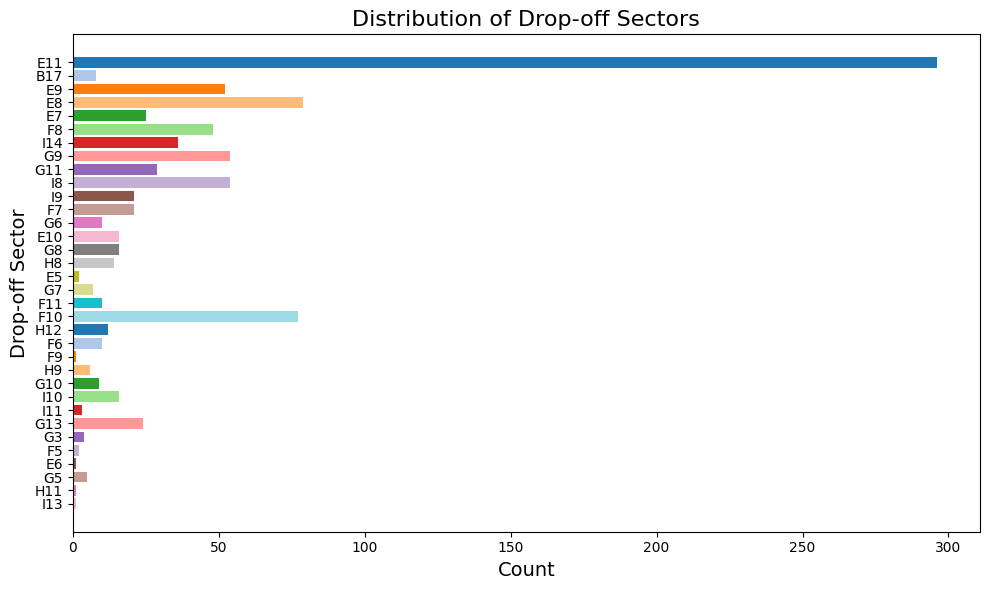

In [57]:
plt.figure(figsize=(10, 8))

# Prepare data for bar chart
sectors_drop = list(pie_drop.keys())
sector_counts = list(pie_drop.values())

# Create the bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Use a horizontal bar chart for better readability
plt.barh(sectors_drop, sector_counts, color=plt.cm.get_cmap("tab20").colors[: len(sectors_drop)])

# Customize layout and appearance
plt.xlabel("Count", fontsize=14)
plt.ylabel("Drop-off Sector", fontsize=14)
plt.title("Distribution of Drop-off Sectors", fontsize=16)
plt.gca().invert_yaxis()  # Reverse the y-axis for top-down display (optional)
plt.tight_layout()

plt.show()


<ipython-input-58-1ae7c56ddfc9>:11: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



<Figure size 1000x800 with 0 Axes>

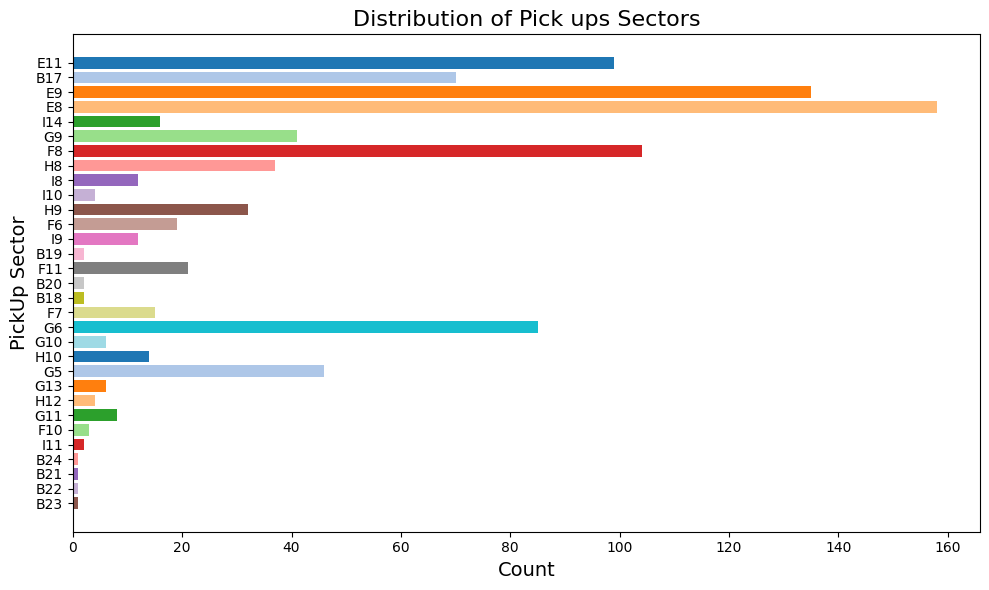

In [58]:
plt.figure(figsize=(10, 8))  # Set figure size for better visibility

# Prepare data for bar chart
sectors_pickup = list(pie_pickup.keys())
sector_counts = list(pie_pickup.values())  # Extract sector counts

# Create the bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Use a horizontal bar chart for better readability
plt.barh(sectors_pickup, sector_counts, color=plt.cm.get_cmap("tab20").colors[: len(sectors_pickup)])

# Customize layout and appearance
plt.xlabel("Count", fontsize=14)
plt.ylabel("PickUp Sector", fontsize=14)
plt.title("Distribution of Pick ups Sectors", fontsize=16)
plt.gca().invert_yaxis()  # Reverse the y-axis for top-down display (optional)
plt.tight_layout()

plt.show()

In [59]:
def locations2coords(list_sectors):
  coordinates = []
  sectors = []
  for sector in list_sectors:

    sector = sector[0] + "-" +sector[1:]

    country="Pakistan"
    city="Islamabad"
    # data = "Queens, New York, New York, United States"
    data =  str(sector)+" Markaz" + ", " + city +", "+country
    Coordinates= gpd.tools.geocode(data, provider='nominatim', user_agent="AIR",timeout=3)

    print(Coordinates)
    print(data)

    x = pd.DataFrame(Coordinates)["geometry"][0].x
    y = pd.DataFrame(Coordinates)["geometry"][0].y
    # print(y,x)
    coordinates.append((y,x))
    sectors.append(sector)

  return {
      "sectors" :sectors,
      "coordinates": coordinates,
      "data points": list(list_sectors.values())
  }

coord_pickup = locations2coords(pie_pickup)
print(coord_pickup)

                    geometry  \
0  POINT (72.97009 33.69485)   

                                             address  
0  E-11/1 Markaz, ای-11, ڈی-12, زون 1, وفاقی دارا...  
E-11 Markaz, Islamabad, Pakistan
                    geometry  \
0  POINT (73.21182 33.59880)   

                                             address  
0  Gulberg Markaz, زون ۵, وفاقی دارالحکومت اسلام ...  
B-17 Markaz, Islamabad, Pakistan
                    geometry  \
0  POINT (73.21182 33.59880)   

                                             address  
0  Gulberg Markaz, زون ۵, وفاقی دارالحکومت اسلام ...  
E-9 Markaz, Islamabad, Pakistan
                    geometry  \
0  POINT (73.21182 33.59880)   

                                             address  
0  Gulberg Markaz, زون ۵, وفاقی دارالحکومت اسلام ...  
E-8 Markaz, Islamabad, Pakistan
                    geometry  \
0  POINT (72.96762 33.61183)   

                                             address  
0  I-14 Markaz, Markaz A, Main Road I-14, I-14/3,.

In [60]:
data_pickup = pd.DataFrame.from_dict(coord_pickup)
data_pickup

,sectors,coordinates,data points
0,E-11,"(33.69485435, 72.97009254986811)",99
1,B-17,"(33.5988041, 73.211818)",70
2,E-9,"(33.5988041, 73.211818)",135
3,E-8,"(33.5988041, 73.211818)",158
4,I-14,"(33.61182625, 72.96761850563234)",16
5,G-9,"(33.6892638, 73.03240340881482)",41
6,F-8,"(33.71154235, 73.03963994362763)",104
7,H-8,"(33.5988041, 73.211818)",37
8,I-8,"(33.66790125, 73.0745438971808)",12
9,I-10,"(33.6477128, 73.03899215780963)",4


# Maps for Drop Off

In [61]:
# Create a Folium map centered at the mean coordinates
m = folium.Map(location=[33.6844, 73.0479], zoom_start=12, control_scale=True)

marker_cluster = MarkerCluster()

# Iterate through your DataFrame and add markers with popups to the cluster
for index, row in data_pickup.iterrows():
    coordinates = row["coordinates"]
    data_points = row["data points"]
    sector = row["sectors"]
    popup_text = f"{sector}'s | DataPoints: {data_points}"

    marker = folium.Marker(location=coordinates, popup=popup_text)
    marker.add_to(marker_cluster)

# Add the MarkerCluster to the map
marker_cluster.add_to(m)

# Display the map
m


In [62]:
data

,Date,Time,Pick up location,drop off location,Yango Economy,Yango Comfort,Yango Bike,Distance (km),Indrive Economy,Indrive Comfort,Indrive Bike,weather,Time Category,Fare Difference,Fare Difference Bike,Weekday,Fare Difference Comfort,Fare Difference Economy
0,2023-11-30,11:28:00,IBH BOYS HOSTEL e/11,Mudan Residence guest house e/11,342,407,66,0.22,178,290,80,1,Morning,164,14,Thu,117,164
1,2023-11-27,1:55:00,Jamia Masjid Qurtubah e/11,Luxury Apartment Hotel & Guest House e/11,167,287,70,0.25,178,290,80,1,NaN,11,10,Mon,3,11
2,2023-11-27,13:55:00,Jamia Masjid Qurtubah e/11,Luxury Apartment Hotel & Guest House e/11,167,287,70,0.25,178,290,80,1,Afternoon,11,10,Mon,3,11
3,2023-11-27,12:38:00,Sir Syed CASE Institute of Technology b/17,Farhan motors and properties Block A Sector B-17,132,165,56,0.35,299,80,178,1,Afternoon,167,122,Mon,85,167
4,2023-11-27,13:15:00,Jamia Masjid Qurtubah e/11,"Autism Resource Centre, Islamabad e/11",167,277,70,0.50,178,290,80,1,Afternoon,11,10,Mon,13,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,2023-12-05,11:10:00,Bahria E-8/1,PIEAS (lehtrar Road),1099,1395,582,30.50,1091,1557,475,1,Morning,8,107,Tue,162,8
994,2023-12-05,10:59:00,Bahria E-8/1,Giga Mall f11,932,1193,524,31.00,1119,1596,487,1,Morning,187,37,Tue,403,187
995,2023-11-29,15:37:00,Margalla Filling Station Total PARCO Petrol Pu...,Chather park murree road,893,1113,980,34.30,1747,535,1227,1,Afternoon,854,247,Wed,578,854
996,2023-11-29,15:29:00,Margalla Filling Station Total PARCO Petrol Pu...,Lake view park murree road,952,1868,1000,38.10,1957,601,1375,1,Afternoon,1005,375,Wed,1267,1005


In [63]:
HeatMap(data_pickup["coordinates"]).add_to(m)


# Show map
m

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

**YANGO** **ECONOMY**

In [65]:
x = data["Distance (km)"]  # Replace "variable_name" with the actual column name
y = data["Yango Economy"]

print(x)
print(y)

0       0.22
1       0.25
2       0.25
3       0.35
4       0.50
       ...  
993    30.50
994    31.00
995    34.30
996    38.10
997    40.10
Name: Distance (km), Length: 998, dtype: float64
0       342
1       167
2       167
3       132
4       167
       ... 
993    1099
994     932
995     893
996     952
997    1042
Name: Yango Economy, Length: 998, dtype: int64


Intercept: 88.16380079240874
Coefficient: 22.722461206544946


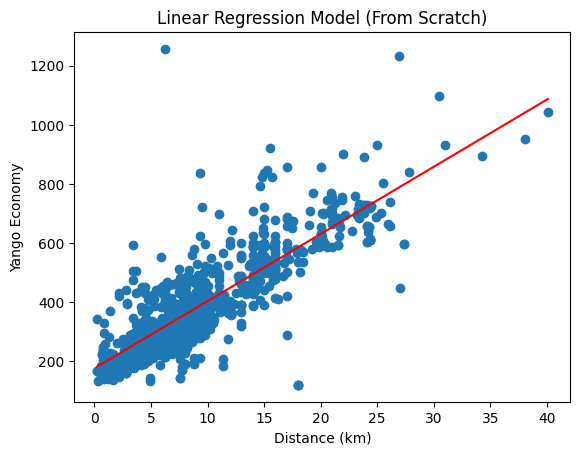

In [66]:
def linear_regression_scratch(X, y, learning_rate=0.001, n_iterations=10000):
    n_samples = len(y)
    weights = np.zeros(X.shape[1])
    bias = 0


    for _ in range(n_iterations):
        y_pred = np.dot(X, weights) + bias

        dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
        db = (1/n_samples) * np.sum(y_pred - y)


        weights -= learning_rate * dw
        bias -= learning_rate * db

    return weights, bias

# Assuming you have a DataFrame named 'data'
# Separate the variable (x) and label (y)
x = data["Distance (km)"].values.reshape(-1, 1)  # Replace "Distance (km)" with the actual column name
y = data["Yango Economy"].values  # Replace "Yango Economy" with the actual column name

# Add a column of ones to represent the intercept term
X = np.c_[np.ones(x.shape[0]), x]

# Train the model using your linear_regression_scratch function
weights, bias = linear_regression_scratch(X, y)

# Print the coefficients (slope and intercept)
print("Intercept:", bias)
print("Coefficient:", weights[1])

# Make predictions using the model
y_predicted = np.dot(X, weights) + bias

# Visualize the data and the regression line
plt.scatter(x, y)
plt.plot(x, y_predicted, color="red")
plt.xlabel("Distance (km)")
plt.ylabel("Yango Economy")
plt.title("Linear Regression Model (From Scratch)")
plt.show()


Linear Regression model for Economy Yango:

y= a + bx

a(intercept) = 88.16380079240874

b(slope) = 22.6998766909484

x=distance

y= prices of economy Yango

**YANGO COMFORT**

Intercept: 115.09413362992223
Coefficient: 28.516205409933935


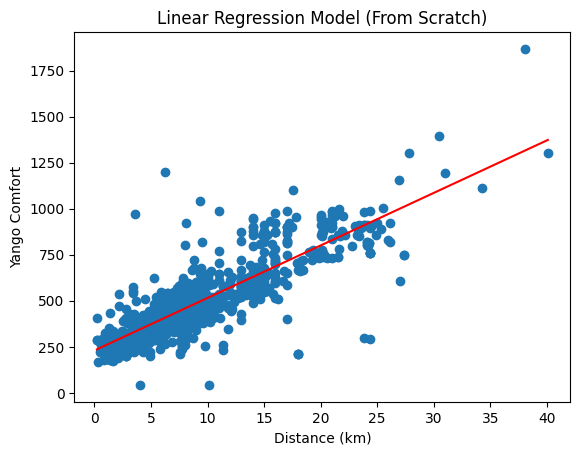

In [67]:
# Separate the variable (x) and label (y)
x = data["Distance (km)"].values.reshape(-1, 1)  # Replace "Distance (km)" with the actual column name
y = data["Yango Comfort"].values  # Replace "Yango Economy" with the actual column name

# Add a column of ones to represent the intercept term
X = np.c_[np.ones(x.shape[0]), x]

# Train the model using your linear_regression_scratch function
weights, bias = linear_regression_scratch(X, y)

# Print the coefficients (slope and intercept)
print("Intercept:", bias)
print("Coefficient:", weights[1])

# Make predictions using the model
y_predicted = np.dot(X, weights) + bias

# Visualize the data and the regression line
plt.scatter(x, y)
plt.plot(x, y_predicted, color="red")
plt.xlabel("Distance (km)")
plt.ylabel("Yango Comfort")
plt.title("Linear Regression Model (From Scratch)")
plt.show()


**YANGO BIKE**

Intercept: 25.82870005725035
Coefficient: 12.516771681188542


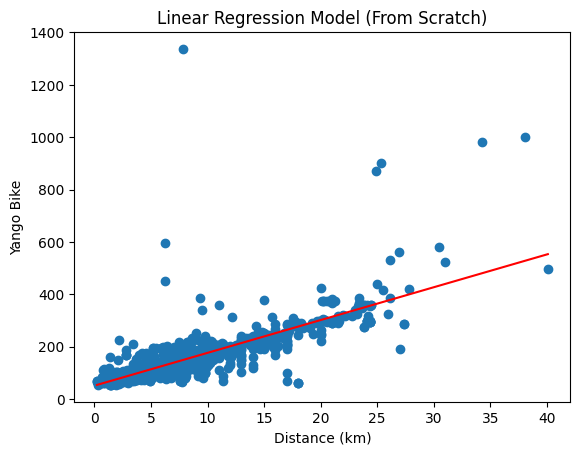

In [68]:
# Separate the variable (x) and label (y)
x = data["Distance (km)"].values.reshape(-1, 1)  # Replace "Distance (km)" with the actual column name
y = data["Yango Bike"].values  # Replace "Yango Economy" with the actual column name

# Add a column of ones to represent the intercept term
X = np.c_[np.ones(x.shape[0]), x]

# Train the model using your linear_regression_scratch function
weights, bias = linear_regression_scratch(X, y)

# Print the coefficients (slope and intercept)
print("Intercept:", bias)
print("Coefficient:", weights[1])

# Make predictions using the model
y_predicted = np.dot(X, weights) + bias

# Visualize the data and the regression line
plt.scatter(x, y)
plt.plot(x, y_predicted, color="red")
plt.xlabel("Distance (km)")
plt.ylabel("Yango Bike")
plt.title("Linear Regression Model (From Scratch)")
plt.show()


**INDRIVE ECONOMY**

Intercept: 67.75675751797009
Coefficient: 32.601852234377176


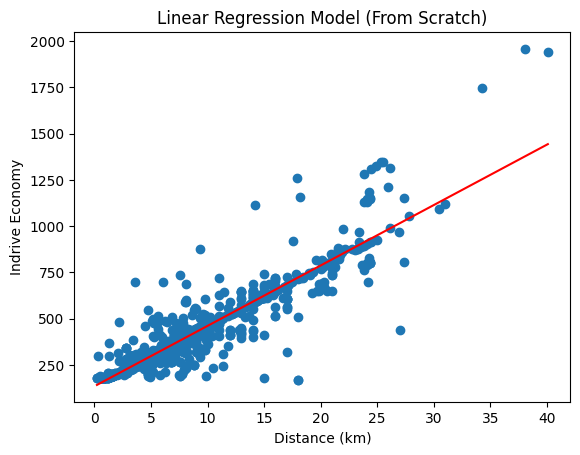

In [69]:
# Separate the variable (x) and label (y)
x = data["Distance (km)"].values.reshape(-1, 1)  # Replace "Distance (km)" with the actual column name
y = data["Indrive Economy"].values  # Replace "Yango Economy" with the actual column name

# Add a column of ones to represent the intercept term
X = np.c_[np.ones(x.shape[0]), x]

# Train the model using your linear_regression_scratch function
weights, bias = linear_regression_scratch(X, y)

# Print the coefficients (slope and intercept)
print("Intercept:", bias)
print("Coefficient:", weights[1])

# Make predictions using the model
y_predicted = np.dot(X, weights) + bias

# Visualize the data and the regression line
plt.scatter(x, y)
plt.plot(x, y_predicted, color="red")
plt.xlabel("Distance (km)")
plt.ylabel("Indrive Economy")
plt.title("Linear Regression Model (From Scratch)")
plt.show()


**INDRIVE COMFORT**

Intercept: 138.53648090496344
Coefficient: 35.56253514831746


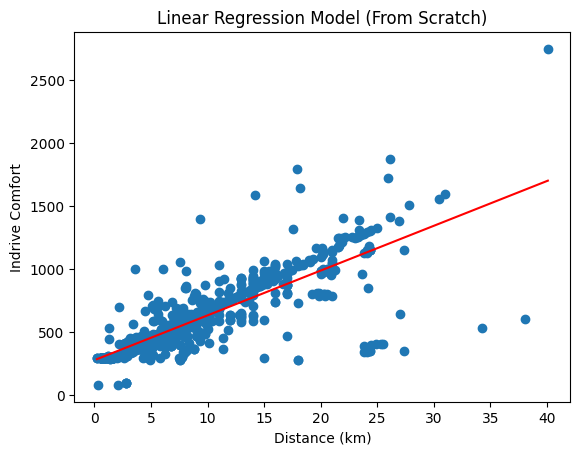

In [70]:
# Separate the variable (x) and label (y)
x = data["Distance (km)"].values.reshape(-1, 1)  # Replace "Distance (km)" with the actual column name
y = data["Indrive Comfort"].values  # Replace "Yango Economy" with the actual column name

# Add a column of ones to represent the intercept term
X = np.c_[np.ones(x.shape[0]), x]

# Train the model using your linear_regression_scratch function
weights, bias = linear_regression_scratch(X, y)

# Print the coefficients (slope and intercept)
print("Intercept:", bias)
print("Coefficient:", weights[1])

# Make predictions using the model
y_predicted = np.dot(X, weights) + bias

# Visualize the data and the regression line
plt.scatter(x, y)
plt.plot(x, y_predicted, color="red")
plt.xlabel("Distance (km)")
plt.ylabel("Indrive Comfort")
plt.title("Linear Regression Model (From Scratch)")
plt.show()


**INDRIVE BIKE**

Intercept: 18.032882254093277
Coefficient: 17.062957779987357


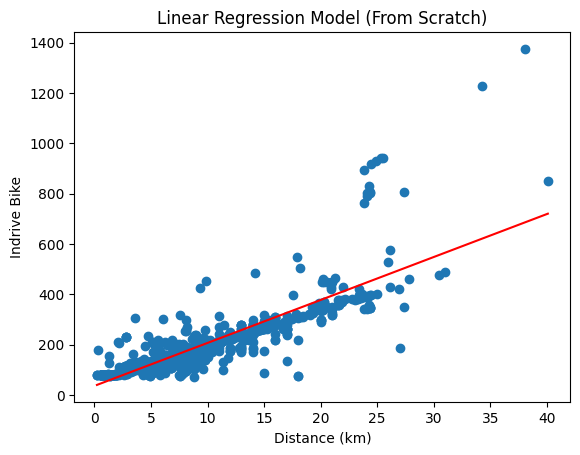

In [71]:
# Separate the variable (x) and label (y)
x = data["Distance (km)"].values.reshape(-1, 1)  # Replace "Distance (km)" with the actual column name
y = data["Indrive Bike"].values  # Replace "Yango Economy" with the actual column name

# Add a column of ones to represent the intercept term
X = np.c_[np.ones(x.shape[0]), x]

# Train the model using your linear_regression_scratch function
weights, bias = linear_regression_scratch(X, y)

# Print the coefficients (slope and intercept)
print("Intercept:", bias)
print("Coefficient:", weights[1])

# Make predictions using the model
y_predicted = np.dot(X, weights) + bias

# Visualize the data and the regression line
plt.scatter(x, y)
plt.plot(x, y_predicted, color="red")
plt.xlabel("Distance (km)")
plt.ylabel("Indrive Bike")
plt.title("Linear Regression Model (From Scratch)")
plt.show()


In [72]:
x=float(input("Enter the distance: "))


#Yango Bike
a=25.82870005725035
b=12.516771681188542
y=a+x*b
print("Yango Bike = ",y)


#Yango Economy
a= 88.16380079240874
b= 22.6998766909484
y=a+x*b
print("Yango Economy = ",y)


#Yango Comfort
a=115.09413362992223
b= 28.516205409933935
y=a+x*b
print("Yango Comfort = ",y)


#Indrive Bike
a=36.123435870643675
b=17.058584366147986
y=a+x*b
print("Indrive Bike = ",y)


#Indrive Economy
a=135.73844224074077
b=32.601852234377176
y=a+x*b
print("Indrive Economy = ",y)


#Indrive Comfort
a=138.53648090496344
b=35.56253514831746
y=a+x*b
print("Indrive Comfort = ",y)

Enter the distance: 1
Yango Bike =  38.345471738438896
Yango Economy =  110.86367748335714
Yango Comfort =  143.61033903985617
Indrive Bike =  53.18202023679166
Indrive Economy =  168.34029447511796
Indrive Comfort =  174.0990160532809
